<a href="https://colab.research.google.com/github/tankim-prio/tankim_assignments/blob/main/tankim_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# Upload the Gym data in google drive
# Display last 5 rows
# Check data types

# My code below:


import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/tasks/gym_membership(a-4)/gym_membership.csv'

column_names = ['id', 'gender', 'birthday', 'age', 'abonement_type', 'visit_per_week',
                'days_per_week', 'attend_group_lesson', 'fav_group_lesson',
                'avg_time_check_in', 'avg_time_check_out', 'avg_time_in_gym',
                'drink_abo', 'fav_drink', 'personal_training', 'name_personal_trainer', 'uses_sauna']


df = pd.read_csv(file_path, names=column_names, quotechar='"')


print("Last 5 rows of the dataset:")
print(df.tail(5))
print("\n")

print("Data types of each column:")
print(df.dtypes)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Last 5 rows of the dataset:
        id  gender    birthday age abonement_type visit_per_week  \
996    996  Female   9/22/1984  40       Standard              3   
997    997  Female  11/19/2008  15       Standard              3   
998    998    Male   10/5/1984  40       Standard              2   
999    999    Male   2/22/2001  23       Standard              4   
1000  1000  Female    5/7/2006  18        Premium              2   

           days_per_week attend_group_lesson fav_group_lesson  \
996        Thu, Tue, Wed               FALSE              NaN   
997        Fri, Mon, Sun                TRUE     XCore, Zumba   
998             Fri, Tue               FALSE              NaN   
999   Mon, Sun, Thu, Tue                TRUE       HIT, XCore   
1000            Thu, Tue               FALSE              NaN   

     avg_time_check_in avg_time_check_out a

In [76]:
# Task 1: Basic Matplotlib (3 plots)
# 1. Bar chart of gym membership types
# Use: gym['abonoment_type'].value_counts()

# 2. Histogram of time in gym
# Use: plt.hist(gym['avg_time_in_gym'])

# 3. Scatter plot: Age vs visits per week
# Use: plt.scatter(gym['Age'], gym['visit_per_week'])

# My code here:




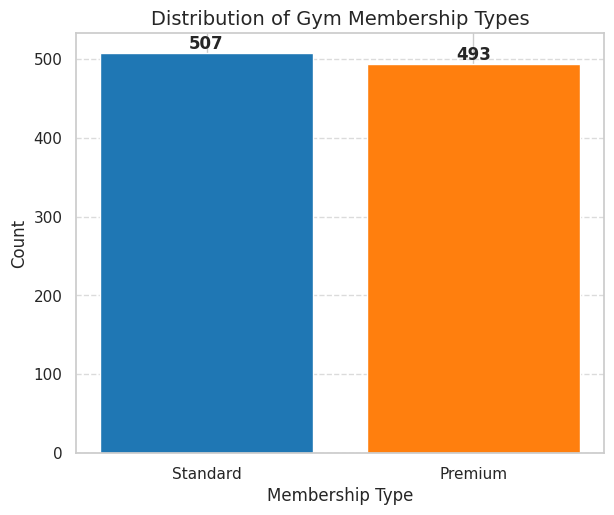

In [75]:
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

gym = pd.read_csv(file_path)


plt.figure(figsize=(15, 12))

# 1. Bar chart of gym membership types
plt.subplot(2, 2, 1)
membership_counts = gym['abonoment_type'].value_counts()
plt.bar(membership_counts.index, membership_counts.values, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Gym Membership Types', fontsize=14)
plt.xlabel('Membership Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(membership_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

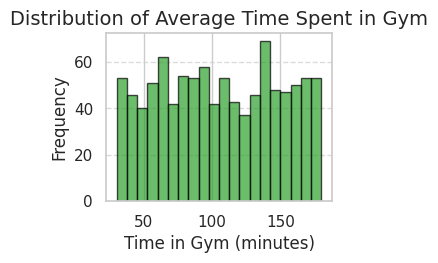

In [62]:
# 2. Histogram of time in gym
plt.subplot(2, 2, 2)
plt.hist(gym['avg_time_in_gym'], bins=20, color='#2ca02c', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Time Spent in Gym', fontsize=14)
plt.xlabel('Time in Gym (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


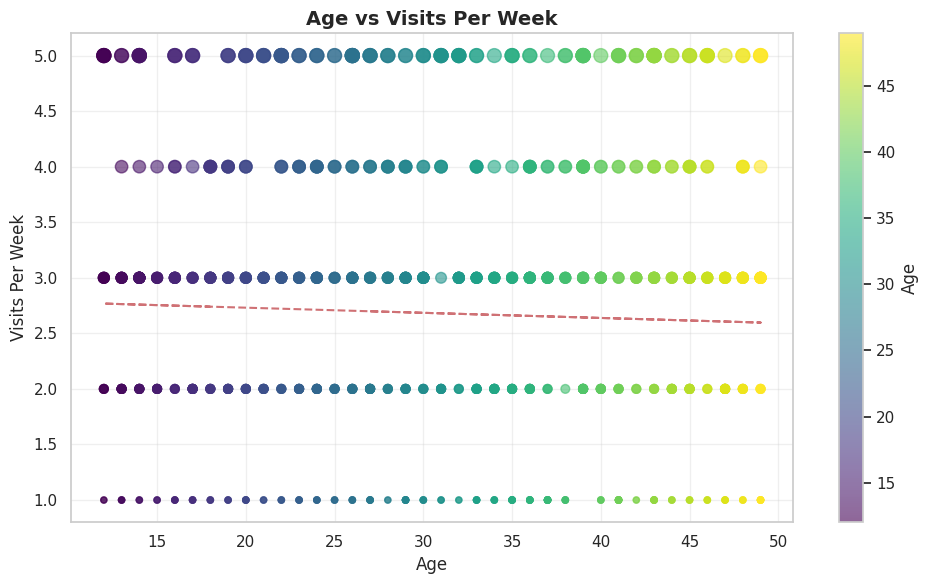

In [71]:
# 3. Scatter plot: Age vs visits per week

plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    gym['Age'],
    gym['visit_per_week'],
    c=gym['Age'],
    s=gym['visit_per_week']*20,
    alpha=0.6,
    cmap='viridis'
)


cbar = plt.colorbar(scatter)
cbar.set_label('Age')


plt.title('Age vs Visits Per Week', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Visits Per Week', fontsize=12)

plt.grid(True, alpha=0.3)
z = np.polyfit(gym['Age'], gym['visit_per_week'], 1)
p = np.poly1d(z)
plt.plot(gym['Age'], p(gym['Age']), "r--", alpha=0.8, label='Trend line')


plt.tight_layout()
plt.show()

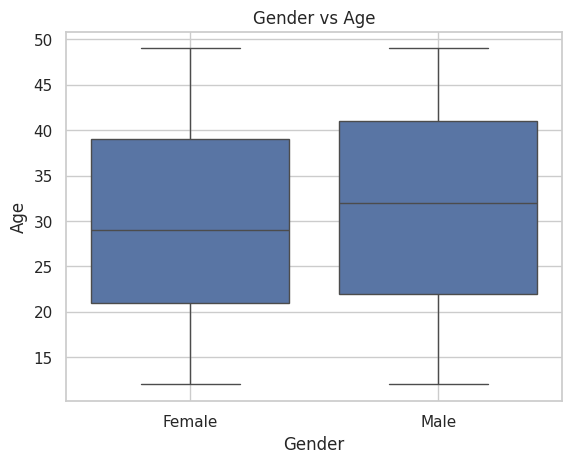

In [68]:
# Task 2: Basic Seaborn(3 plots)
# 1. Box plot: Gender vs Age
# Use: sns.boxplot(data=gym, x='gender', y='Age')

# 2. Count plot: Days per week
# Use: sns.countplot(data=gym, x='days_per_week')

# 3. Bar plot: Average visits by membership type
# Use: sns.barplot(data=gym, x='abonoment_type', y='visit_per_week')

# My code here:



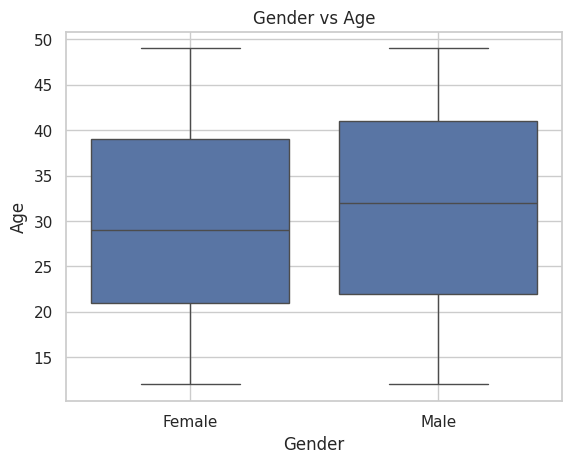

In [74]:
# 1. Box plot: Gender vs Age
import seaborn as sns
sns.boxplot(data=gym, x='gender', y='Age')
plt.grid(True)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Gender vs Age')
plt.show()


/tmp/ipython-input-1655487445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='days_per_week', palette=colors)


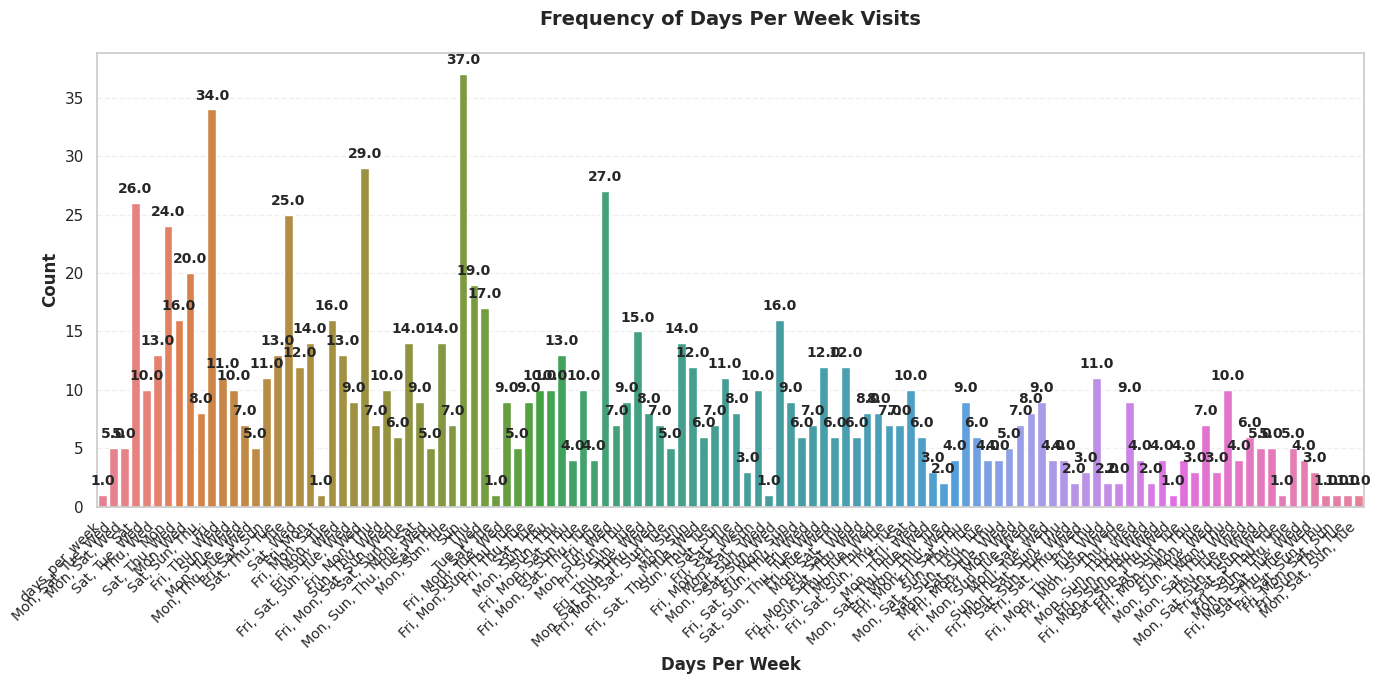

In [73]:
# 2. Count plot: Days per week

plt.figure(figsize=(14, 7))
colors = sns.color_palette("husl", len(df['days_per_week'].unique()))

ax = sns.countplot(data=df, x='days_per_week', palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold',
                xytext=(0, 5), textcoords='offset points')


plt.xlabel('Days Per Week', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Frequency of Days Per Week Visits', fontsize=14, fontweight='bold', pad=20)


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', axis='y')
plt.tight_layout()

plt.show()

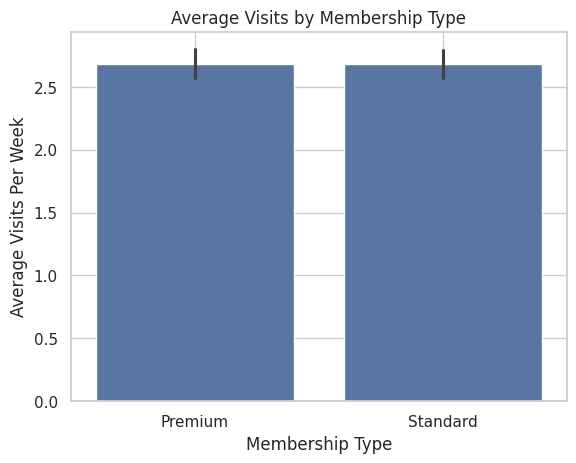

In [50]:
# 3. Bar plot: Average visits by membership type
sns.barplot(data=gym, x='abonoment_type', y='visit_per_week')
plt.grid(True)
plt.xlabel('Membership Type')
plt.ylabel('Average Visits Per Week')
plt.title('Average Visits by Membership Type')
plt.show()